<center><h3>Universidade Federal de Pelotas - Cursos de Ciência e Engenharia de Computação</h3></center> 
<center><h4>Disciplina: Cálculo Numérico Computacional Profa. Larissa A. de Freitas</h4> </center> 


<center><h2><strong>Relatório 1 – Resolução Numérica de Equações Algébricas e Transcendentes<strong></h2> </center> 

<h3> Aluno: Vinícius Hallmann</h3>

### **Imports**

In [1905]:
from math import e as euler
from math import tan as tan
from math import pi as pi
from math import asin as asin
from math import trunc as trunc
from IPython.display import display
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## **Tabelas**

In [1906]:
REPETITIONS   = 'n\u207F'
LEFT_BOUND    = 'a\u207F'
RIGHT_BOUND   = 'b\u207F'
MIDDLE_POINT  = 'x\u207F'
FX            = 'f(x\u207F)'
FA            = 'f(a\u207F)'
FA_FX         = 'f(a\u207F) * f(x\u207F)'

table_values_bisection = {
    REPETITIONS: [],
    LEFT_BOUND: [],
    RIGHT_BOUND: [],
    MIDDLE_POINT: [],
    FX: [],
    FA: [],
    FA_FX: []
}

table_values_false_position = {
    REPETITIONS: [],
    LEFT_BOUND: [],
    RIGHT_BOUND: [],
    MIDDLE_POINT: [],
    FX: []
}

table_values_newton = {
    REPETITIONS: [],
    MIDDLE_POINT: [],
    FX: []
}

## **Funções auxiliares**


In [1907]:
def plot_function(a, b, func, root, miniplot=False):

    x_values = np.linspace(-10, 10, 10000)
    fig, ax_main = plt.subplots()
    
    # Configuração do subplot principal
    ax_main.tick_params(axis='x', colors='white')
    ax_main.tick_params(axis='y', colors='white')
    ax_main.axhline(linewidth=1, color='black')
    ax_main.axvline(linewidth=1, color='black')
    ax_main.scatter(a, 0, color='red', edgecolor='black', zorder=5)
    ax_main.scatter(b, 0, color='red', edgecolor='black', zorder=5)
    ax_main.set_ylim(-10, 10)

    ax_main.grid(True, linestyle='--', alpha=0.7)
    ax_main.plot(x_values, np.vectorize(func)(x_values))

    if miniplot == False:
        plt.show()
        return
    # Configuração do subplot menor (zoom)
    ax_zoom = fig.add_axes([0.6, 0.6, 0.3, 0.3])  
    ax_zoom.set_xticks([])
    ax_zoom.set_yticks([])
    ax_zoom.tick_params()
    ax_zoom.axhline(linewidth=1, color='black')
    ax_zoom.axvline(linewidth=1, color='black')
    ax_zoom.scatter(a, 0, color='red', edgecolor='black', zorder=5)
    ax_zoom.scatter(b, 0, color='red', edgecolor='black', zorder=5)
    ax_zoom.scatter(root, func(root), color='green', edgecolor='black', zorder=5)
    ax_zoom.set_xlim(a - 0.15, b + 0.15)
    ax_zoom.set_ylim(a -0.15, b + 0.15)
    
    ax_zoom.grid(True)
    ax_zoom.plot(x_values, np.vectorize(func)(x_values))
    
    for spine in ax_zoom.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

    plt.show()
    
def average( a, b ):
    return ( a + b ) / 2

def weighted_average( a, b, f_a, f_b ):
    return (  a * f_b  -  b * f_a )  / ( f_b - f_a )

def product( x1, x2 ):
    return x1 * x2 

def display_bissection_table():
    df = pd.DataFrame( table_values_bisection )
    df.columns = [REPETITIONS, LEFT_BOUND, RIGHT_BOUND, MIDDLE_POINT, FX, FA, FA_FX]
    display( df.style.hide( axis="index" ).format( na_rep = None, precision = 4 ) )
    clear_table(table_values_bisection)

def display_false_position_table():
    df = pd.DataFrame( table_values_false_position )
    df.columns = [REPETITIONS, LEFT_BOUND, RIGHT_BOUND, MIDDLE_POINT, FX]
    display( df.style.hide( axis="index" ).format( na_rep = None, precision = 6 ) )
    clear_table(table_values_false_position)

def add_values( repetitions= None , a= None , b= None , x= None , f_x= None , f_a= None , f_x_f_a= None  ):
    table_values_bisection[REPETITIONS].append( repetitions )
    table_values_bisection[LEFT_BOUND].append( a )
    table_values_bisection[RIGHT_BOUND].append( b )
    table_values_bisection[MIDDLE_POINT].append( x )
    table_values_bisection[FX].append( f_x )
    table_values_bisection[FA].append( f_a )
    if f_x_f_a > 0:
        table_values_bisection[FA_FX].append( '> 0' )
    elif f_x_f_a < 0:
        table_values_bisection[FA_FX].append( '< 0' )

def add_false_position_values( repetitions= None , a= None , b= None , x= None , f_x= None ):
    table_values_false_position[REPETITIONS].append( repetitions )
    table_values_false_position[LEFT_BOUND].append( a )
    table_values_false_position[RIGHT_BOUND].append( b )
    table_values_false_position[MIDDLE_POINT].append( x )
    table_values_false_position[FX].append( f_x )

def relative_error( exact, approximate ):
    return abs( ( exact - approximate ) / exact ) * 100


def clear_table(table):
    for key in table:
        table[key] = []

green_color = "\033[32m"  
blue_color = "\033[34m"   
red_color = "\033[31m"    
reset_color = "\033[0m"   

## **Métodos**

### **Parametros**

<li>left:   Limite a esquerda do intervalo.</li>
<li>right:  Limite a direita do intervalo.</li>
<li>x0 e x1:     Aproximação inicial.</li>

### **Critérios de paradas**
<li>e: Epsilon;</li>

<li>n: Número de iterações.</li>

**Return middle: Raiz aproximada.**


In [1908]:
def bisection( left , right , e = None, n = None, func = None ):
    counter = 0
    if e is None and n is None :
        raise ValueError( 'You must provide either the number of iterations or the epsilon margin' )
    if func is None:
        raise ValueError('You must provide a function')
    #CASO 1 ONDE SO E DADA A PRECISAO
    if e is not None and n is None:
        while abs( right - left )  >= e:
            counter += 1
            middle = average( left, right )
            prod = product( func( left ), func( middle ) )
            add_values( counter, left, right, middle, func( middle ), func( left ), prod )
            if prod > 0:
                left = middle
            else:
                if prod < 0:
                    right = middle
    #CASO 2 ONDE SO E DADO O NUMERO DE ITERACOES
    elif e is None and n is not None:                       
        for iteration in range(1, n + 1):
            counter += 1
            middle = average( left, right )
            prod = product( func( left ), func( middle ) )
            add_values( counter, left, right, middle, func( middle ), func( left ), prod )
            if prod > 0:
                left = middle
            else:
                if prod < 0:
                    right = middle	
    #CASO 3 ONDE E DADO O NUMERO DE ITERACOES E A PRECISAO
    elif e is not None and n is not None:
        for iteration in range(1, n + 1):
            counter += 1
            middle = average( left, right )
            prod = product( func( left ), func( middle ) )
            add_values( counter, left, right, middle, func( middle ), func( left ), prod )
            if prod > e:
                left = middle
            else:
                if prod < e:
                    right = middle
    return middle

In [1909]:
def false_positon( left, right, e = None, n = None , func = None ):
    counter = 0
    if e is None and n is None :
        raise ValueError( 'You must provide either the number of iterations or the epsilon margin' )
    
    if func(left) * func(right) >= 0:
       raise ValueError( 'The function does not change sign in the interval' )
    
    #CASO 1 ONDE SO E DADA A PRECISAO
    if e is not None and n is None:
        while abs( right - left ) >= e:
            counter += 1
            middle = weighted_average( left, right, func( left ), func( right ) )
            if abs(func( middle )) < e:
                return middle
            prod = product( func( left ), func( middle ) )
            add_false_position_values( counter, left, right, middle, func( middle ))
            if prod > e:
                left = middle
            else:
                if prod < e:
                    right = middle
    #CASO 2 ONDE SO E DADO O NUMERO DE ITERACOES
    elif n is not None and e is None:
        for iteration in range(1, n + 1):
            counter += 1
            middle = weighted_average( left, right, func( left ), func( right ) )
            prod = product( func( left ), func( middle ) )
            add_false_position_values( counter, left, right, middle, func( middle ))
            if prod > 0:
                left = middle
            else:
                if prod < 0:
                    right = middle          
    #CASO 3 ONDE E DADO O NUMERO DE ITERACOES E A PRECISAO
    elif n is not None and e is not None:
        for iteration in range(1, n + 1):
            counter += 1
            middle = weighted_average( left, right, func( left ), func( right ) )
            if abs(func( middle )) < e:
                return middle
            prod = product( func( left ), func( middle ) )
            add_false_position_values( counter, left, right, middle, func( middle ))
            if prod > e:
                left = middle
            else:
                if prod < e:
                    right = middle
    return middle
       

In [1910]:
def newton_raphson(x0, e=None, n=None, func=None, dfunc=None):
    if e is None and n is None:
        raise ValueError('You must provide either the number of iterations or the epsilon margin')
    if func is None or dfunc is None:
        raise ValueError('You must provide a function')
    
    # CASO 1 ONDE SÓ É DADA A PRECISÃO
    if e is not None and n is None:
        while abs(func(x0)) >= e:
            if dfunc(x0) == 0:
                return x0
            i = x0 - (func(x0) / dfunc(x0))
            if abs(i - x0) < e:
                return i
            x0 = i

    # CASO 2 ONDE SÓ É DADO O NÚMERO DE ITERAÇÕES
    elif e is None and n is not None:
        for iteration in range(1, n + 1): 
            if dfunc(x0) == 0:
                return x0
            i = x0 - (func(x0) / dfunc(x0))
            x0 = i

    # CASO 3 ONDE É DADO O NÚMERO DE ITERAÇÕES E A PRECISÃO
    elif e is not None and n is not None:
        for iteration in range(1, n + 1): 
            if abs(func(x0)) < e:
                return x0
            if dfunc(x0) == 0:
                return x0
            i = x0 - ( func(x0) / dfunc(x0) )
            
            if abs(i - x0) < e:
                return i
            x0 = i

    return x0

In [1911]:
def secant(x0, x1, e,  n, func):
    if e is None and n is None:
        raise ValueError('You must provide either the number of iterations or the epsilon margin')
    if func is None:
        raise ValueError('You must provide a function')
    
    #CASO 1 ONDE SO E DADA A PRECISAO
    if e is not None and n is None:
        while abs(func(x1)) >= e or abs(x1 - x0) >= e:
            divisor = func(x1) - func(x0)
            if divisor == 0:
                return x1
            x2 = x1 - (func(x1) * (x1 - x0) / divisor)
            x0 = x1
            x1 = x2
    
    #CASO 2 ONDE SO E DADO O NUMERO DE ITERACOES
    elif e is None and n is not None:
        for iteration in range(1, n):
            divisor = func(x1) - func(x0)
            if divisor == 0:
                return x1
            x2 = x1 - (func(x1) * (x1 - x0) / divisor)
            x0 = x1
            x1 = x2
            
    #CASO 3 ONDE E DADO O NUMERO DE ITERACOES E A PRECISAO
    elif e is not None and n is not None:
        
        for iteration in range(1, n + 1):
            if abs(func(x0)) < e:
                return x0
            if abs(func(x1)) < e or abs(x1 - x0) < e:
                return x1
            divisor = func(x1) - func(x0)
            if divisor == 0:
                return x1
            x2 = x1 - (func(x1) * (x1 - x0) / divisor)
            if abs(func(x2)) < e or abs(x2 - x1) < e:
                return x2
            x0 = x1
            x1 = x2
    return x1


### **Questão 1** ###

A função f(x) = tg(πx) - 6 tem um zero em (1/π) arctg(6) ≈ 0.447431543. Sejam x0 = 0 e x1 = 0.48. Utilize 10 iterações de cada um dos métodos a seguir para encontrar a aproximação dessa raiz. Qual é o método mais eficiente e por quê?

a. Método da Bissecção

b. Método da Falsa Posição
    
c. Método da Secante

Faça a comparação dos erros relativos percentuais para os métodos para determinar a raiz da função.

O método da bisseção após 10 iterações, a raiz encontrada é aproximadamente 0.44765625.

In [1912]:
f = lambda x: tan( pi*x ) - 6
x0 = 0
x1 = 0.48
iter = 10
try:
    start = time.time()
    root_bisection = bisection( x0, x1, None, iter, f )
    print(f"Raiz encontrada pelo método da bisseção: {green_color}{root_bisection}{reset_color}")
except ValueError as e:
    print( e )

Raiz encontrada pelo método da bisseção: 0.44765625


O Método da Falsa Posição após 10 iterações, a raiz encontrada é aproximadamente 0.44412066175818793.

In [1913]:
try:
    root_false_position = false_positon ( x0, x1, None, iter, f )
    print(f"Raiz encontrada pelo método da falsa posição: {green_color}{root_false_position}{reset_color}")
except ValueError as e:
    print( e )

Raiz encontrada pelo método da falsa posição: 0.44412066175818793


O Método da Secante após 10 iterações, a raiz encontrada é -195.89499482451663. Esse resultado indica que o método não convergiu adequadamente. Esse método utiliza dois pontos iniciais para construir uma reta e encontrar a próxima aproximação da raiz. Devida a natureza dessa função, esse método não consegue convergir para uma raiz.

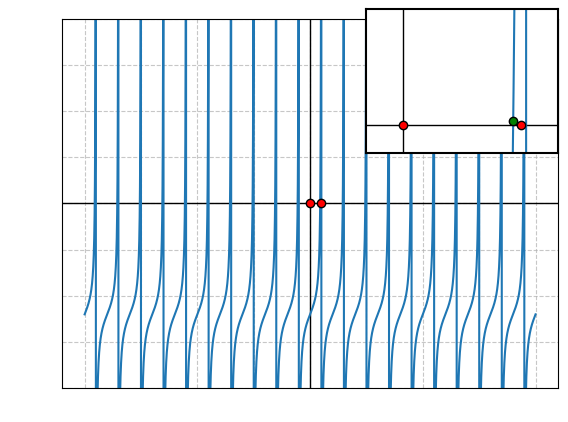

In [1914]:
plot_function(x0, x1, lambda x: tan( pi*x ) - 6, root_bisection, True)

In [1915]:
try:
    root_sec = secant( x0, x1, None, iter, f )
    print(f"Raiz encontrada pelo método da secante: {red_color}{root_sec}{reset_color}")
except ValueError as e:
    print( e )

Raiz encontrada pelo método da secante: -195.89499482451663


**Comparação dos Erros Relativos Percentuais**

Para comparar a eficiência dos métodos, analisamos os erros relativos percentuais em relação à raiz verdadeira = 0.447431543.
Com base nos resultados dos erros relativos, o método da Bissecção é o que possui o menor erro relativo percentual, sendo de 0.050222%. O método da Falsa Posição tambem conseguiu convergir para uma raiz porem com um erro relativo maior de 0.739975%. E o método da secante não conseguiu convergir para uma raiz de forma certa, resultando em um erro relativo de 43882.115474%. Portanto, para esta função e intervalo específicos, o Método da Bissecção é o mais eficiente devido à sua garantia de convergência e menor erro relativo percentual após 10 iterações.

In [1916]:
root = 0.447431543
erro_bissection     = relative_error(root, root_bisection)
erro_false_position = relative_error(root, root_false_position)
erro_secante        = relative_error(root, root_sec)

print(f"Erro relativo percentual - Método da Bisseção: {green_color}{erro_bissection:.6f}{reset_color}%")
print(f"Erro relativo percentual - Método da Falsa Posição: {green_color}{erro_false_position:.6f}{reset_color}%")
print(f"Erro relativo percentual - Método da Secante: {green_color}{erro_secante:.6f}{reset_color}%")

Erro relativo percentual - Método da Bisseção: 0.050222%
Erro relativo percentual - Método da Falsa Posição: 0.739975%
Erro relativo percentual - Método da Secante: 43882.115474%


---

### **Questão 2** ###

O polinômio de quarto grau f (x) = 230x4 + 18x3 + 9x2- 221x - 9, tem dois zeros reais, um em [-1, 0] e outro em [0, 1]. Tente encontrar a aproximação desses zeros com a precisão de 10-6, utilizando:

a. Método da Falsa Posição

b. Método da Secante

c. Método de Newton-Raphson/Tangente

d. Plote um gráfico para explicar a diferença entre os resultados obtidos pelos Métodos da Falsa Posição e da Secante 

Utilize as extremidades de cada intervalo como aproximações iniciais em (a) e
(b) e os pontos médios como as aproximações iniciais em (c).

In [1917]:
f = lambda x: 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
df = lambda x: 920*x**3 + 54*x**2 + 18*x - 221
a = -1
b = 0
c = (a + b) / 2
tol = 10**-6

O método da Falsa Posição com tolerancia de 0.000001 a raiz encontrada é aproxidamente -0.040659284770926674

In [1918]:
try:
    root_false_position1 = false_positon( a, b, tol, None, f )
    print(f"Raiz encontrada pelo método da falsa posição: {green_color}{root_false_position1}{reset_color}")
except ValueError as e:
    print(e)

Raiz encontrada pelo método da falsa posição: -0.040659284770926674


O método da Secante com tolerancia de 0.000001 a raiz encontrada é aproxidamente -0.040659288315725135

In [1919]:
try:
    root_sec1            = secant( a, b, tol, None, f )
    print(f"Raiz encontrada pelo método da secante: {green_color}{root_sec1}{reset_color}")
except ValueError as e:
    print(e)

Raiz encontrada pelo método da secante: -0.040659288315725135


O método de Newton Raphson com tolerancia de 0.000001 a raiz encontrada é aproxidamente -0.04065928831575899

In [1920]:
try:
    root_newton1         = newton_raphson( c, tol, 10, f, df)
    print(f"Raiz encontrada pelo método de Newton-Raphson: {green_color}{root_newton1}{reset_color}\n")
except ValueError as e:
    print(e)

Raiz encontrada pelo método de Newton-Raphson: -0.04065928831575899



No primeiro intervalo entre [-1,0] os 3 métodos conseguiram encontrar valores bem próximos da raiz da função

In [1921]:
a = 0
b = 1
c = (a + b) / 2

O método da Falsa Posição no segundo intervalo retorna uma raiz encontrada em aproxidamente 0.9623983842387566. Como dito no enunciado, essa função possui dois zeros reais, sendo um em cada intervalo e o método da Falsa Posição consegue achar os dois.

In [1922]:
try:
    root_false_position2 = false_positon( a, b, tol, None, f )
    print(f"Raiz encontrada pelo método da falsa posição: {green_color}{root_false_position2}{reset_color}")
except ValueError as e:
    print(e)

Raiz encontrada pelo método da falsa posição: 0.9623983842387566


A raiz encontrada pelo método da Secante nesse segundo intervalo é de aproximadamente = -0.04065928831557162

In [1923]:
try:
    root_sec2            = secant( a, b, tol, None, f )
    print(f"Raiz encontrada pelo método da secante: {green_color}{root_sec2}{reset_color}")
except ValueError as e:
    print(e)

Raiz encontrada pelo método da secante: -0.04065928831557162


A raiz encontrada pelo método de Newton Raphson nesse segundo intervalo é de aproximadamente = -0.04065928834533494

In [1924]:
try:
    root_newton2         = newton_raphson( 0.5, tol, None, f, df)
    print(f"Raiz encontrada pelo método de Newton-Raphson: {green_color}{root_newton2}{reset_color}\n")
except ValueError as e:
    print(e)

Raiz encontrada pelo método de Newton-Raphson: -0.04065928834533494



**Diferença dos resultados obtidos**



Gráficos com as raizes encontradas pelo método da Falsa Posição

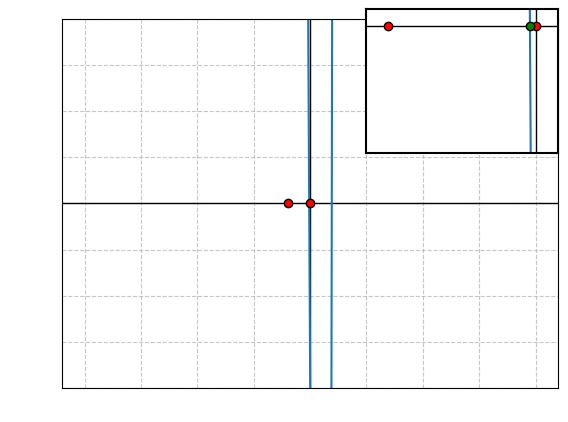

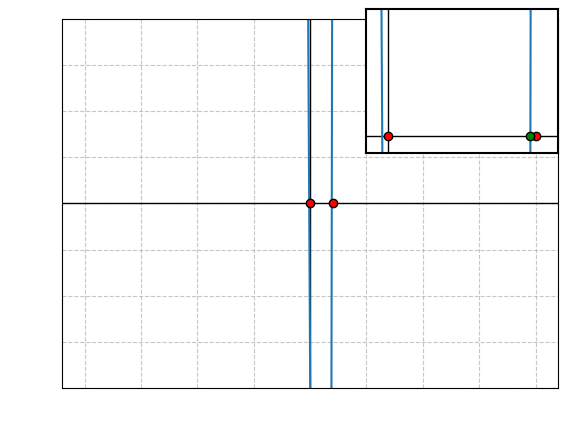

In [1925]:
plot_function(-1, 0, f, root_false_position1, True)
plot_function(0, 1, f, root_false_position2, True)

Gráficos com as raizes encontradas pelo Método da Secante

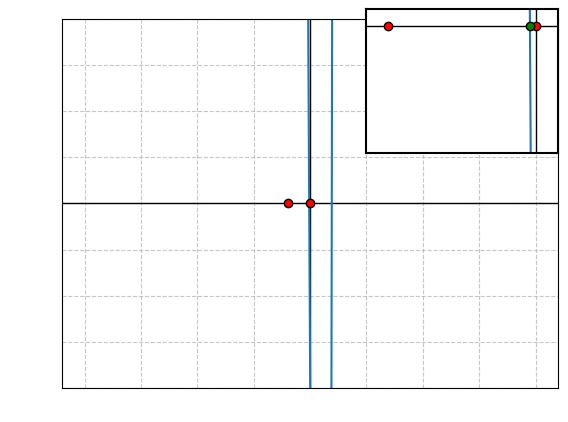

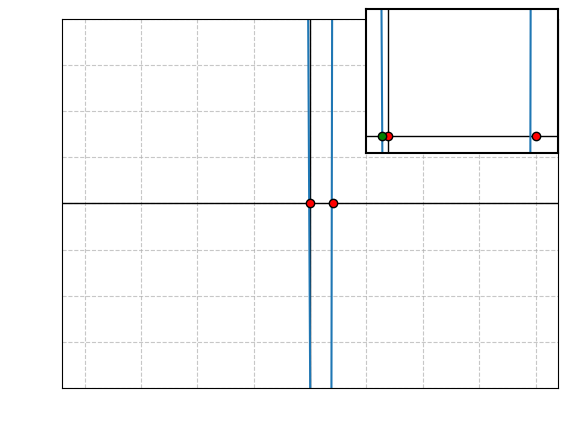

In [1926]:
plot_function(-1, 0, f, root_sec1, True)
plot_function(0, 1, f, root_sec2, True)

Podemos ver que o método da Falsa Posição encontrou a raiz no intervalo positivo esperado, enquanto o método da Secante encontrou a raiz negativa, possivelmente devido à escolha inadequada das aproximações iniciais, por exemplo, quando mudamos o X0 para = 0.1 no segundo intervalo(0,1) no método da secante faz com que ele ache a raiz dentro do intervalo. Como já dito em aula os métodos podem achar ou não a raiz e isso depende de alguns fatores e novamente nesse caso a estimativa inicial impactou no resultado final do método da secante.


---

### **Questão 3** ###

Uma gamela de comprimento L tem seção transversal semicircular com raio r. Quando a gamela está cheia com água até uma distância h do topo, o volume V de água é V = L [0,5πr²- r²arcsen(h/r) - h(r² – h²)½].

![alt text](relatorio 1/images/imagem_relatorio.PNG)

Suponha que L = 10 pés, r = 1 pé e V = 12,4 pés. Usando o Método da Bissecção, determine a profundidade da água na gamela com precisão de 0,01 pé.

Utilizando o Método da Bissecção, a profundidade h encontrada é aproximadamente 0.1640625 pés. Para descobrirmos a profundidade da água, podemos fazer r - h e o resultado será 0.8359375

In [1927]:
f = lambda h: asin(h) + h*(1-h**2)**0.5 + 1.24 - 0.5*pi
r = 1
v = 12.4
l = 10
tol = 10**-2
iter = 10
a = 0
b = 1
try:
    root = bisection( a, b, tol, None, f )
    print(f"Raiz encontrada pelo método da bisseção: {green_color}{root}{reset_color}\nSubstituindo o valor de h na função temos: {green_color}{f(root)}{reset_color}\nProfundiade: {green_color}{r - root}{reset_color}")
except ValueError as e:
    print( e )


Raiz encontrada pelo método da bisseção: 0.1640625
Substituindo o valor de h na função temos: -0.004149324142395772
Profundiade: 0.8359375


### **Questão 4** ###

Você está projetando um tanque esférico para armazenar água para uma pequena cidade.

![alt text](relatorio 1/images/imagem_relatorio2.PNG)

O volume de líquido que ele pode armazenar pode ser calculado por V = (π h² [3R−h]/3)

Onde V é o volume (m³), h é a profundidade de água no tanque (m) e R é o raio do tanque (m). Se R = 3m, até qual profundidade o tanque deve ser enchido para conter 30 m³? Use 3 iterações do Método do Newton-Raphson/Tangente para obter a resposta. 

Utilizando o método de Newton-Raphson, após 3 iterações, a profundidade h encontrada é aproximadamente 2.0269 m. Portanto a profundidade para que o tanque contenha 30 m³ de água é 2.0269.

In [1928]:
f = lambda h: (pi*h**2*(3*r-h)/3) - v
df = lambda h: pi*h*(-h + 6)
r = 3
v = 30
tol = 0.001
try:
    newton_raphson_root = newton_raphson(1, tol, 3, f, df)
    print(f"Raiz encontrada: {green_color}{newton_raphson_root}{reset_color}\nSubstituindo a raiz encontrada na função f(x) temos: {green_color}{f(newton_raphson_root)}{reset_color}")

except ValueError as e:
    print( e )

Raiz encontrada: 2.0269189318856173
Substituindo a raiz encontrada na função f(x) temos: 0.0003340446665838215


### **Questão 5** ###

O Método de Newton-Raphson/Tangente pode não ser convergente. Verifique que, para as funções e estimativas iniciais mostradas em (a)e (b), o método não funciona.

a. f(x) = 1/10 + xe⁻ˣ com x₁ = 2

b. f(x) = x³ - x - 3  com x₁ = -3

Na Questão A, utilizando uma estimativa inicial x1=2, o método de Newton-Raphson não convergiu para a raiz. Isso ocorre porque o método requer que a estimativa inicial x1 esteja suficientemente próxima da raiz. Uma melhor escolha para x1
seria 0, que levaria à raiz da função em -0.09134885618508723.

In [1929]:
f = lambda x: 1/10 + x*euler**-x
df = lambda x: -x*euler**-x + euler**-x
tol = 0.001
iter = 10
try:
    root_a_2 = newton_raphson (2, tol, iter, f, df)
    print(f"Raiz encontrada: {red_color}{root_a_2}{reset_color} usando x1 = 2 \nSubstituindo a raiz encontrada na função f(x) temos: {red_color}{f(root_a_2)}{reset_color}\n")

    root_a_0 = newton_raphson (0, tol, iter, f, df)
    print(f"Raiz encontrada: {green_color}{root_a_0}{reset_color} usando x1 = 0 \nSubstituindo a raiz encontrada na função f(x) temos: {green_color}{f(root_a_0)}{reset_color}")


except ValueError as e:
    print( e )

Raiz encontrada: 7.393684957031746e+47 usando x1 = 2 
Substituindo a raiz encontrada na função f(x) temos: 0.1

Raiz encontrada: -0.09134885618508723 usando x1 = 0 
Substituindo a raiz encontrada na função f(x) temos: -8.648054353421752e-05


Na Questão B, utilizando uma estimativa inicial x1=−3, o método também não conseguiu convergir. Em ambos os casos, a escolha inadequada da estimativa inicial resultou na não convergência para a raiz. Portanto, é fundamental escolher uma estimativa inicial x0 que esteja próxima da raiz verdadeira para garantir a convergência do método de Newton-Raphson.

In [1930]:
f = lambda x: x**3 - x - 3
df = lambda x: 3*x**2 - 1
tol = 0.0001
iter = 10
try:
    root_b_3 = newton_raphson (-3, tol, iter, f, df)
    print(f"Raiz encontrada: {red_color}{root_b_3}{reset_color} usando x1 = -3\nSubstituindo a raiz encontrada na função f(x) temos: {red_color}{f(root_b_3)}{reset_color}\n")

    root_b_2 = newton_raphson (2, tol, iter, f, df)
    print(f"Raiz encontrada: {green_color}{root_b_2}{reset_color} usando x1 = 2\nSubstituindo a raiz encontrada na função: {green_color}{root_b_2**3 - root_b_2 - 3}{reset_color}")
except ValueError as e:
    print( e )

Raiz encontrada: -1.1474851932167662 usando x1 = -3
Substituindo a raiz encontrada na função f(x) temos: -3.3634341136398707

Raiz encontrada: 1.671702569747502 usando x1 = 2
Substituindo a raiz encontrada na função: 1.9848200399685823e-05
